##### Grading Feedback Cell
- I like what you did with handy spark!
- Final Grade: 105%

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here:
- Chaithra Kopparam Cheluvaiah
- 326926205


# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@g.syr.edu>
- Faculty Assistants: 
  - Warren Justin Fernandes <wjfernan@syr.edu>
  - Ruchita Hiteshkumar Harsora <	rharsora@g.syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

# Medical Insurance Analysis
This assignment uses a medical insurance dataset with the following columns:
- age: age of primary beneficiary
- sex: female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast,southwest, northwest.
- charges: Individual medical costs billed by health insurance

**Note that you are required to split data into train / test / validation sets as needed to use in the pipelines created in this and future assignments**.

In [1]:
%%bash
# Do not change or modify this cell
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already installed
pip install pyspark &> /dev/null

# Download the data files from github
# If the data file does not exist in the colab environment
data_file_1=insurance.csv

if [[ ! -f ./${data_file_1} ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/${data_file_1} &> /dev/null
fi

In [2]:
!pip install handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#creating spark session and spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ist718-hw03').getOrCreate()
sc = spark.sparkContext

In [4]:
spark

In [5]:
# importing required libaries
import matplotlib.pyplot as plt
import numpy as np
import pyspark.sql.functions as f
from pyspark.sql.types import DecimalType
import seaborn as sns
import pandas as pd

In [6]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [7]:
from pyspark.ml import feature, Pipeline, regression, classification
# handling categorical features
from pyspark.ml.feature import StringIndexer
import pyspark.sql.functions as f
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Question 1 (10 pts):
Read the data into a spark dataframe named medical_df.  Column names should be named age, sex, bmi, children, smoker, region, and charges.  Print the resulting dataframe schema and shape such that it is easy for the graders to find and interpret.  Verify your schema makes sense.  If the schema does not makes sense, fix it.

In [8]:
medical_df = spark.read.csv('insurance.csv', header=True, inferSchema=True)

In [9]:
medical_df.show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 4

In [10]:
# schema
medical_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [11]:
# shape of the dataframe
shape_df = (medical_df.count(), len(medical_df.columns))
shape_df

(1338, 7)

##### Grading Feedback Cell

# Question 2 (10 pts):
Explore the data.  Make a pair plot.  Use a spark built in function to provide a statistical summary of medical_df.

Explain the following 2 items:
- What variables are positively and negatively correlated with charges.
- Provide a brief summary that highlights what is interesting about the summary statistics. 


Text(0.5, 1.02, 'Pair Plot of Medical Charges data')

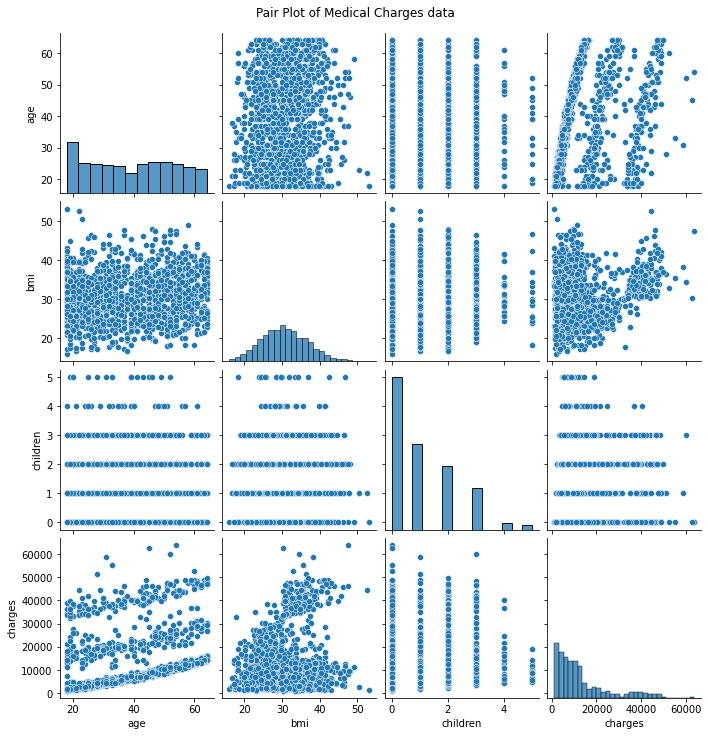

In [12]:
medical_pd_df = medical_df.toPandas()

# pair plot
pp = sns.pairplot(medical_pd_df)
pp.fig.suptitle('Pair Plot of Medical Charges data', y=1.02)

In [13]:
# summary statistics
medical_df.summary().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    25%|                27|  null|             26.29|                0|  null|     null|         4738.2682|
|    50%|                39|  null|              30.4|                1|  null|     null|         9377.9047|
|    75%|          

Text(0.5, 1.0, 'Correlation Matrix')

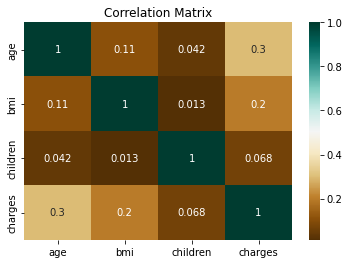

In [14]:
# identifying which features are positively and negatively correlated to charges

sns.heatmap(medical_pd_df.corr(), annot=True, cmap='BrBG')
plt.title('Correlation Matrix')

Your explanation here <br>

According to correlation matrix above,
*   The variables - `"age", "bmi", and "children"` are positively correlated with `'charges'`, however, the correlation coefficient for the `"children"` variable is `0.068`, which is quite near to `0`. This suggests a very weak positive correlation.
*   There are no negatively correlated variables


Summary Statistics:

- 75th percentile of the medical charges is `$16657.72` and the maximum value is `$63770.43`. There is a large difference between the 75th percentile and the maximum value which indicates the presence of potential outliers.

- The average medical charges is higher than the median cost. If the mean is higher than the median, data is likely right-skewed in distribution.We can observe the same in pair plot above.

- The variables `'age'` and `'bmi'` have very small difference between mean and median values. This indicates data is symmetrically distributed.



##### Grading Feedback Cell

# Question 3 (10 pts):
Do some data exploration.  Create 2 plots which highlight something interesting / surprising about the data. Provide descriptions of the 2 plots that you made.  Why did you make this plots and what is interesting about them. You will be graded as compared to the rest of the class on this question.

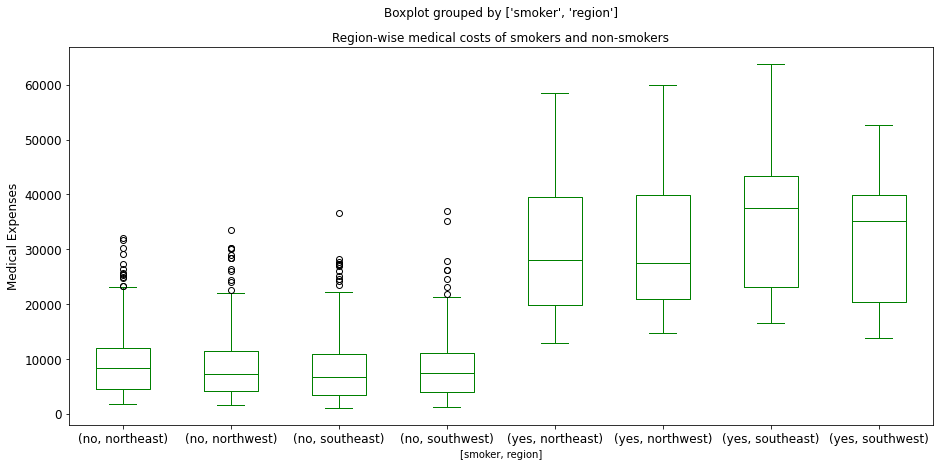

In [15]:
# plot-01
axes = medical_pd_df.boxplot(column=['charges'], by=['smoker', 'region'], figsize=(15,7), fontsize=12, grid=False, color='green')
axes.set_ylabel('Medical Expenses', fontdict={'size': 12})
axes.title.set_text('Region-wise medical costs of smokers and non-smokers')

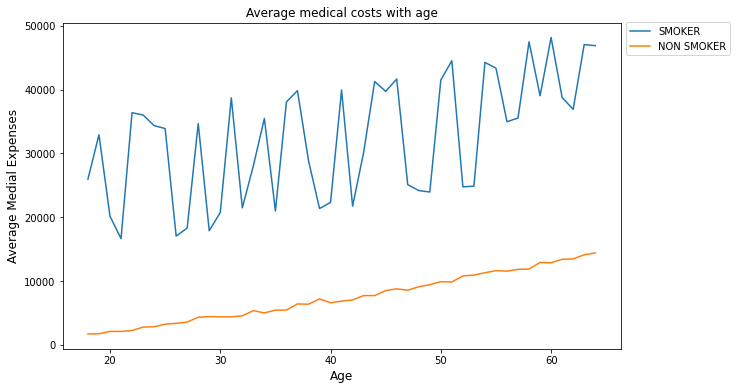

In [16]:
#plot - 02
fig = plt.figure(figsize=(10,6))
plt.title('Average medical costs with age')
medical_pd_df[(medical_pd_df['smoker']=='yes')].groupby(['age'])['charges'].median().plot(label='SMOKER')
medical_pd_df[(medical_pd_df['smoker']=='no')].groupby(['age'])['charges'].median().plot(label='NON SMOKER')
plt.xlabel('Age', fontdict={'size':12})
plt.ylabel('Average Medial Expenses', fontdict={'size':12})
plt.legend(loc=(1.01,0.9))

Your explanation here:<br>

Plot-01: The boxplots shows region-wise medical charges of smokers and non-smokers.

Boxplots provide good visual feel for the differences between medical costs of smokers and non-smokers. Its quiet evident that the interquartile regions of the two groups does not overlap at all for any region. This is a very intuitive and informal indication that smokers may spend more on healthcare than non-smokers, and it can play a significant role in estimating medical costs.

<br>

Plot-02: Line graph shows average medical costs of smokers and non-smokers for different age groups.

Although the medical costs of smokers and non-smokers have both increased with age, smokers' medical costs has more peaks than non-smokers' over different ages. The spikes could be caused by unusual medical expenses.This gives us a general picture of health problems smokers can experience, suggesting that smokers might not have long-term stable health.

##### Grading Feedback Cell
- scatter plot would probably be better for the 2nd plot above

# Question 4 (10 pts): 
In this question you will perform feature engineering.  The medical_df is not ready for use with linear regression because some columns are categorical.  Create a new dataframe named fe_medical_df (feature engineered medical dataframe) which adds new feature engineered columns. Your feature engineering should take into account the best practices outlined in lecture.  You are free to ignore the best practices as long as your feature engineering produces better machine learning results than the best practices would have produced. We will be looking at your model scores in the following questions and grading your results as compared to the rest of the class. The feature engineering you perform in this question will have a direct result on how well your model performs below.  Encapsulate your feature engineering in a spark machine learning pipeline named fe_pipe (feature engineering pipe).

Provide an explanation on exactly what feature engineering transformations you made for every column you transform.  We expect to see a separate explanation for each and every transformation performed. 

1. ONE HOT ENCODING - SEX, SMOKER, and REGION

In [17]:
fe_pipe = Pipeline(stages=[feature.StringIndexer(inputCols=['sex','smoker','region'], 
                                                 outputCols=['sex_indexed','smoker_indexed','region_indexed']), 
                           feature.OneHotEncoder(inputCols=['sex_indexed','smoker_indexed','region_indexed'], 
                                                 outputCols=['sex_encoded','smoker_encoded','region_encoded'])
                           ])
fe_medical_df  = fe_pipe.fit(medical_df).transform(medical_df)
fe_medical_df.show()

+---+------+------+--------+------+---------+-----------+-----------+--------------+--------------+-------------+--------------+--------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_indexed|smoker_indexed|region_indexed|  sex_encoded|smoker_encoded|region_encoded|
+---+------+------+--------+------+---------+-----------+-----------+--------------+--------------+-------------+--------------+--------------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|        1.0|           1.0|           2.0|    (1,[],[])|     (1,[],[])| (3,[2],[1.0])|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|        0.0|           0.0|           0.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[0],[1.0])|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|        0.0|           0.0|           0.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[0],[1.0])|
| 33|  male|22.705|       0|    no|northwest|21984.47061|        0.0|           0.0|           1.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[1],

Your explanation here:<br>

## Handling Categorical Variables

To perform one-hot encoding, we must first convert the categorical column into a numeric column (0, 1, ...) using `StringIndexer` and then convert the numeric column into one-hot encoded columns using `OneHotEncoder`.

1. ``StringIndexer``: ``StringIndexer`` converts labels where the label with the highest count is label 0, next highest is label 1, etc.

  The StringIndex is applied on the input columns - "sex", "smoker", and "region". The output columns are "sex_indexed," "smoker_indexed," and "region_indexed."
  
  The label index determined by the frequency of labels in that column. 
  - "sex" column:
      - "female" -> 0
      - "male" -> 1
  - "smoker" column:
      - "yes" -> 0
      - "no" -> 1
  - "region" column:
    - "southeast" -> 0
    - "northwest" -> 1
    - "southwest" -> 2
    - "northeast" -> 3
  
2.   ``OneHotEncoding``: The ``OneHotEncoder`` encodes a categorical value into a vector of Boolean values where the Boolean is true in the position corresponding to the feature. 

  After performing OneHotEncoder's `fit()` and `transform()` on "sex_indexed," "smoker_indexed," and "region_indexed" columns, we end up with a new columns as specified in the `outputCols` argument. Each value in onehotencoding is a sparse vector defined with three values: size (number of categories minus one), index (index in the vector that holds value), and value (value at that index).










##### Grading Feedback Cell
No need to one hot encode binary columns but it doesn't hurt anything either - just adds unneeded complexity.

# Question 5 (10 pts):
Create a new pipeline named lr_pipe which encapsulates fe_pipe, any needed linear regression support objects, and a linear regression object.  Linear regression support objects are anything you need over and above what is in fe_pipe in order to successfully run linear regression.  Write some code that prints out the stage names of lr_pipe and fe_pipe such that it's easy for the graders to find and interpret.  We don't expect to have to read code to interpret your results.

Train and test lr_pipe using medical_df. To evaluate lr_pipe, first write a spark expression to compute MSE on the resulting fitted model.  Second, use a built in spark evaluator object to compute MSE.  Print out the results from both your expressions and the built in evaluator object such that it's easy for the graders to find, interpret, and distinguish between the 2 test cases. We don't expect to have to reverse engineer your code to interpret the expected results.

In [18]:
lr_pipe = Pipeline(stages=[fe_pipe, 
                           feature.VectorAssembler(inputCols=['age','bmi','children','sex_encoded','smoker_encoded','region_encoded'], 
                                                   outputCol='independent_features'), 
                           regression.LinearRegression(featuresCol='independent_features', labelCol='charges')])

In [19]:
print('fe_pipe stages:',[stage.uid for stage in fe_pipe.getStages()])
print('lr_pipe stages:', [stage.uid for stage in lr_pipe.getStages()])

fe_pipe stages: ['StringIndexer_5492b2b07b45', 'OneHotEncoder_e608a066bd65']
lr_pipe stages: ['Pipeline_27d59e69010e', 'VectorAssembler_ee8cfde45e01', 'LinearRegression_9fe55dda78fc']


In [20]:
# train test split
train_df, test_df = medical_df.randomSplit([0.8,0.2])
lr_model = lr_pipe.fit(train_df)
lr_pred_results = lr_model.transform(test_df)

In [21]:
mean_squared_error = f.mean((f.col('charges') - f.col('prediction'))**2).alias('Mean_Squared_Error')
lr_pred_results.select(mean_squared_error.cast(DecimalType(18, 4))).show()

+------------------+
|Mean_Squared_Error|
+------------------+
|     31374203.6141|
+------------------+



In [22]:
# MSE score
lr_evaluator = RegressionEvaluator(labelCol=lr_pipe.getStages()[-1].getLabelCol(),
                                   predictionCol=lr_pipe.getStages()[-1].getPredictionCol(),
                                   metricName='mse').evaluate(lr_pred_results)
lr_evaluator                               

31374203.61410975

##### Grading Feedback Cell

# Question 6 (10 pts):
The goal of this question is to build a pipeline which can be used to perform inference.  Create a new pipeline named inf_pipe which encapsulates fe_pipe and adds new spark ML statistical components, linear regression support components, and a linear regression object.  The goal is to compare linear regression coefficients between each other in order to learn something about the data set.  Exclude any features which are not useful to the analysis.  inf_pipe Shall use the charges column as the target.  Score inf_pipe using a spark built in evaluator with the MSE scoring metric.  The output dataframe shall be named inf_medical_df.

Explanation:  First, explain what spark ML statistical component(s) you added to inf_pipe which were needed in order to be able to compare linear regression components between each other.  Second, explain what features you excluded from the analysis (if any) and why.

In [23]:
inf_pipe = Pipeline(stages=[fe_pipe, 
                            feature.VectorAssembler(inputCols=['age', 'bmi', 'children'], outputCol='numeric_features'),
                            feature.StandardScaler(withMean=True, withStd=True, inputCol='numeric_features', outputCol='numeric_features_std'),
                            regression.LinearRegression(featuresCol='numeric_features_std', labelCol='charges')])

In [24]:
inf_model_fitted = inf_pipe.fit(train_df)
inf_medical_df = inf_model_fitted.transform(test_df)

In [25]:
lr_inf_evaluator = RegressionEvaluator(labelCol=inf_pipe.getStages()[-1].getLabelCol(),
                                predictionCol=inf_pipe.getStages()[-1].getPredictionCol(),
                                metricName='mse').\
                                evaluate(inf_medical_df)
lr_inf_evaluator                              

117751128.31866723

In [26]:
# Grading cell do not modify
display(inf_medical_df.show(10))

+---+------+------+--------+------+---------+----------+-----------+--------------+--------------+-------------+--------------+--------------+-----------------+--------------------+------------------+
|age|   sex|   bmi|children|smoker|   region|   charges|sex_indexed|smoker_indexed|region_indexed|  sex_encoded|smoker_encoded|region_encoded| numeric_features|numeric_features_std|        prediction|
+---+------+------+--------+------+---------+----------+-----------+--------------+--------------+-------------+--------------+--------------+-----------------+--------------------+------------------+
| 18|female| 27.28|       3|   yes|southeast|18223.4512|        0.0|           1.0|           0.0|(1,[0],[1.0])|     (1,[],[])| (3,[0],[1.0])| [18.0,27.28,3.0]|[-1.4868172450546...| 8061.912874019701|
| 18|female| 36.85|       0|    no|southeast| 1629.8335|        0.0|           0.0|           0.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[0],[1.0])| [18.0,36.85,0.0]|[-1.4868172450546...| 9329.710726255

None

##### Grading Feedback Cell

Your explanation here:<br>

`feature.StandardScaler(~)` is added to `inf_pipe` to compare the linear regression co-efficients of `'age','bmi', and 'children'`. 

All the categorical variables - `smoker, sex, and region` are excluded from the analysis because it makes no sense to interpret these standardized columns using categorical variables. For instance, consider the case when the region feature's co-efficient is -2.3. This suggests that there will be an increase in medical costs for every decline in the 2.3 region. This interpretation seems a bit strange.

##### Grading Feedback Cell

# Question 7 (10 pts):
Extract the linear regression coefficients from inf_pipe and collect them in a pandas dataframe named inf_pd.  The inf_pd dataframe shall have 2 columns: predictor and value.  Load the predictor column with the name of the coefficient and the value column with the linear coefficient values from the linear regression model.  Sort inf_pd by the value column in ascending order. 

In [27]:
co_efficients = inf_model_fitted.stages[-1].coefficients.toArray()
co_efficients

array([3688.97118165, 2093.95058064,  782.09923968])

In [28]:
feature_names = inf_medical_df.schema[inf_model_fitted.stages[1].getOutputCol()].metadata['ml_attr']['attrs'].values()
predictors = list()
for attr in feature_names:
  for individual_attr in attr:
    predictors.append((individual_attr['name'], co_efficients[individual_attr['idx']]))

In [29]:
predictors = sorted(predictors, key=lambda x:x[1]) # sorting based on co-efficient value

In [30]:
inf_pd = pd.DataFrame(data=predictors, columns=['Predictor','Value'])

External Reference:

https://discuss.dizzycoding.com/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-names-in-spark-ml/

In [31]:
# Grading cell do not modify
display(inf_pd)

,Predictor,Value
0,children,782.099240
1,bmi,2093.950581
2,age,3688.971182


Your most important positive / negative predictor here:<br>


##### Grading Feedback Cell
The vector assembler collects data in the order you tell it to collect the data.  No need to extract the order from the VA but also nothing wrong with that either.

# Question 8 (10 pts):
Create a new dataframe named strat_med_df (stratified medical dataframe) by adding a new column to fe_medical_df named rate_pool.  Create the rate_pool column by stratifying the charges column into charges greater than and less than the median of the charges column.  Assign an integer 0 to charges that are less than or equal to the median, and a 1 to charges greater than the median.  What is the most important positive and negative predictors?

In [32]:
median_charges = fe_medical_df.approxQuantile('charges',probabilities=[0.5],relativeError=0)
median_discretizer = feature.Binarizer(threshold=median_charges[0], inputCol='charges', outputCol='rate_pool')
strat_med_df= median_discretizer.transform(fe_medical_df)

In [33]:
# grading cell do not modify
display(strat_med_df.show(10))
strat_med_df.printSchema()

+---+------+------+--------+------+---------+-----------+-----------+--------------+--------------+-------------+--------------+--------------+---------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_indexed|smoker_indexed|region_indexed|  sex_encoded|smoker_encoded|region_encoded|rate_pool|
+---+------+------+--------+------+---------+-----------+-----------+--------------+--------------+-------------+--------------+--------------+---------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|        1.0|           1.0|           2.0|    (1,[],[])|     (1,[],[])| (3,[2],[1.0])|      1.0|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|        0.0|           0.0|           0.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[0],[1.0])|      0.0|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|        0.0|           0.0|           0.0|(1,[0],[1.0])| (1,[0],[1.0])| (3,[0],[1.0])|      0.0|
| 33|  male|22.705|       0|    no|northwest|21984.47061|        0.0|       

None

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)
 |-- sex_indexed: double (nullable = false)
 |-- smoker_indexed: double (nullable = false)
 |-- region_indexed: double (nullable = false)
 |-- sex_encoded: vector (nullable = true)
 |-- smoker_encoded: vector (nullable = true)
 |-- region_encoded: vector (nullable = true)
 |-- rate_pool: double (nullable = true)



##### Grading Feedback Cell

##### Grading Feedback Cell

# Question 9 (10 pts):
Create a new pipeline named strat_pipe which predicts the rate_pool column in strat_med_df.  Train and test strat_pipe using strat_med_df.  Score strat_pipe using a built in spark evaluator, 3 fold cross validation, and an AUC (area under the ROC curve) scoring metric. 

In [34]:
strat_pipe = Pipeline(stages=[feature.VectorAssembler(inputCols=['age','bmi','children','sex_encoded','smoker_encoded','region_encoded'], 
                                                      outputCol='strat_features'), 
                              classification.LogisticRegression(featuresCol='strat_features', labelCol='rate_pool')])

In [35]:
# train test split
strat_train_df, strat_test_df = strat_med_df.randomSplit([0.8, 0.2])
strat_classifier = strat_pipe.fit(strat_train_df)

In [36]:
clf_evaluator = BinaryClassificationEvaluator(labelCol=strat_pipe.getStages()[-1].getLabelCol(), 
                                              rawPredictionCol = strat_pipe.getStages()[-1].getRawPredictionCol(),
                                              metricName='areaUnderROC' )
clf_pred_results = strat_classifier.transform(strat_test_df)
clf_auc = clf_evaluator.evaluate(clf_pred_results)
print('AUC of strat_pipe:',clf_auc)

AUC of strat_pipe: 0.9232951666835543


In [37]:
# cross validation without hyperparameter tuning
clf_cross_validation = CrossValidator(estimator=strat_pipe , estimatorParamMaps= ParamGridBuilder().build(), numFolds=3, evaluator=clf_evaluator)
clf_cross_val_model_fitted = clf_cross_validation.fit(strat_train_df)

In [38]:
print('AUC of 3-fold cross validation:',clf_cross_val_model_fitted.avgMetrics)

AUC of 3-fold cross validation: [0.9552357994338313]


##### Grading Feedback Cell

# Question 10 (10 pts):
Create an ROC plot from the results of question 9 above.  Explain the process of how a ROC curve is created (don't tell me how your code works, tell me how a ROC curve is created).  Describe the main points of how a ROC curve is created and convince me that you understand the high level process of how to create a ROC curve.

In [39]:
from handyspark import BinaryClassificationMetrics

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


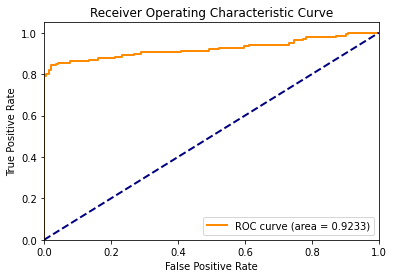

In [40]:
bcm = BinaryClassificationMetrics(clf_pred_results, scoreCol=strat_pipe.getStages()[-1].getProbabilityCol(), 
                                  labelCol=strat_pipe.getStages()[-1].getLabelCol() )
bcm.plot_roc_curve()

External Referecen: https://github.com/dvgodoy/handyspark

##### Grading Feedback Cell

Your explanation here:<br>

The ROC and AUC is mostly used for binary classification problems. The default threshold for logistic regression is 0.5. Probabilities lower than 0.5 are equal to 0, whereas probabilities higher than 0.5 are equal to 1. 

For constructing ROC and AUC, we will be considering different threshold values like 0, 0.2, 0.4, 0.6, 0.8, 1. For each threshold, we compute the true positive rate and the false positive rate.

$$TPR=\frac{TP}{TP+FN}$$
<br>

$$FPR=\frac{FP}{FP+TN}$$
<br>

There will be FPR on the x-axis and TPR on the y-axis. When we plot all the (FPR, TPR) values for every threshold, we will ultimately obtain a curve similar to the one shown above (orange curve). The orange curve is called ROC curve. AUC will be the area under this curve.

Larger the area under the curve `->` better the model. A good model will always have the ROC curve above the navy blue line in the graph.

We can choose the threshold value for our model depending on the business requirement and by analyzing the ROC curve.

##### Grading Feedback Cell

**Extra Credit (5 pts)**  This question is optional.  If you choose to answer this question, you will earn 5 extra credit points.  If you choose not to answer this question, no points will be deducted from your score.  Solve the following equation for $c$ symbolically using the python sympy package.  Convert the solved symbolic solution to a latex format (this can be done with a python call), then populate the solution cell with the resulting latex code so that your solution shows up symbolically - similar the way that the equation below is rendered.

$$c g - c h + e \left(a + 1\right)^{b} - \frac{d \left(\left(a + 1\right)^{b} - 1\right)}{a} + \frac{f \left(\left(a + 1\right)^{b} - 1\right)}{a} = 0$$

In [41]:
import sympy as sym
from sympy.abc import a,b,c,d,e,f,g,h

equation = c*g - c*h + e*(a+1)**b - (d*((a+1)**b-1)/a) + (f*((a+1)**b-1)/a)
solution= sym.solve(equation, c)

sym.latex(solution)

'\\left[ \\frac{- a e \\left(a + 1\\right)^{b} + d \\left(a + 1\\right)^{b} - d - f \\left(a + 1\\right)^{b} + f}{a \\left(g - h\\right)}\\right]'

Your solved equation in latex here such that it renders as a human readable equation:<br>


$$c=\left[ \frac{- a e \left(a + 1\right)^{b} + d \left(a + 1\right)^{b} - d - f \left(a + 1\right)^{b} + f}{a \left(g - h\right)}\right]$$

##### Grading Feedback Cell
+5